In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
titanic_dataset = pd.read_csv(r"C:\Users\USER\Documents\Machine Learning Project\Titanic\train.csv")

In [64]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic_dataset.shape

(891, 12)

In [66]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [68]:
titanic_data = titanic_dataset.drop(columns= 'Cabin', axis= 1)

In [69]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
titanic_data['Age'].mean()

29.69911764705882

In [72]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)

In [73]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [74]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [75]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)

In [76]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Data Visualization

In [79]:
sns.set()

Number of people that Survived and UnSurvived

<function matplotlib.pyplot.show(close=None, block=None)>

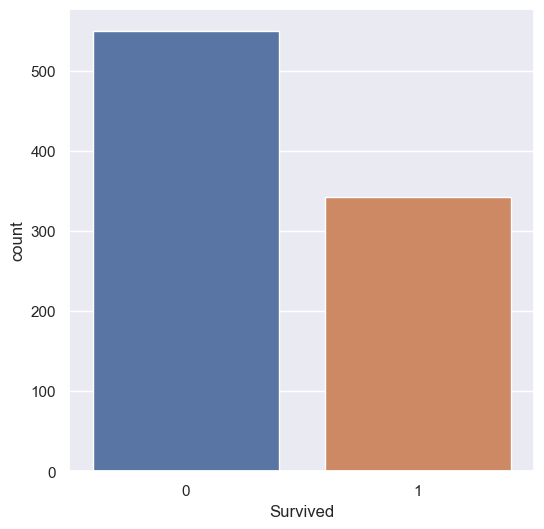

In [80]:
figure = plt.figure(figsize=(6,6))
sns.countplot(x= 'Survived', data= titanic_data)
plt.show

Number of male and female

<function matplotlib.pyplot.show(close=None, block=None)>

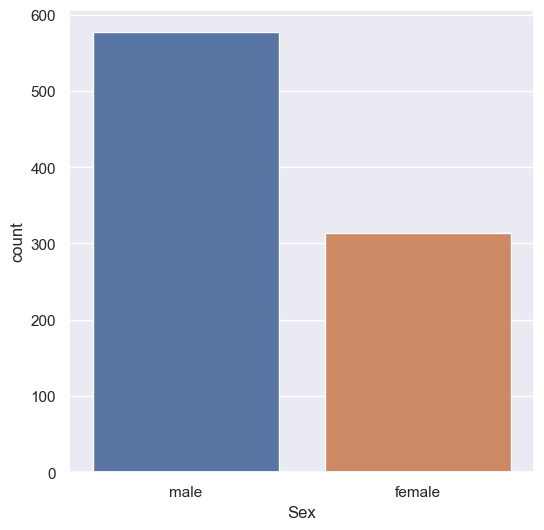

In [81]:
figure = plt.figure(figsize=(6,6))
sns.countplot(x= 'Sex', data= titanic_data)
plt.show

Number of male and female that survived

<function matplotlib.pyplot.show(close=None, block=None)>

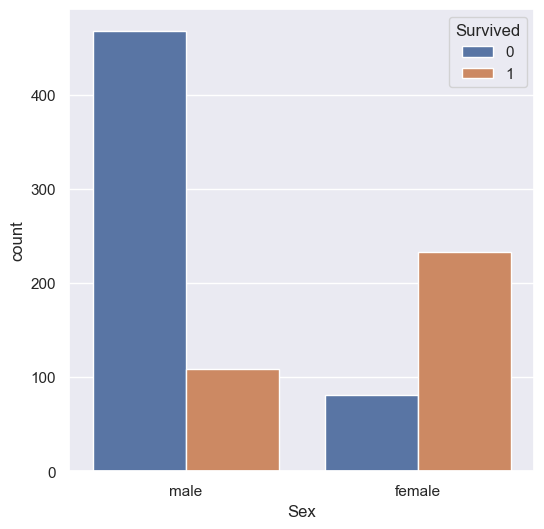

In [82]:
figure = plt.figure(figsize=(6,6))
sns.countplot(x= 'Sex', hue= 'Survived', data= titanic_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

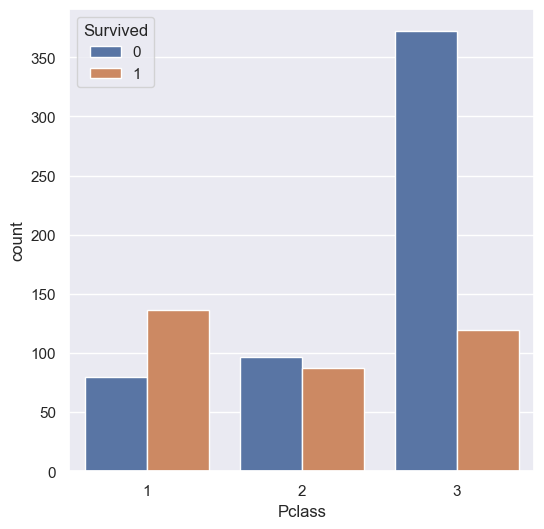

In [83]:
figure = plt.figure(figsize=(6,6))
sns.countplot(x= 'Pclass', hue= 'Survived', data= titanic_data)
plt.show

In [84]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [85]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [86]:
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C': 1, 'Q': 2}}, inplace= True)

In [87]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [88]:
X = titanic_data.drop(columns= ['Name','Survived', 'Ticket', 'PassengerId'], axis= 1)
Y = titanic_data['Survived']

In [89]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [90]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Spliting data into training and test data

In [91]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size= 0.2, random_state= 2)

In [92]:
X_train.shape, X_test.shape, Y_train.shape

((712, 7), (179, 7), (712,))

Model Evaluation

In [93]:
model= LogisticRegression()

In [94]:
model.fit(X_train, Y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Accuracy

In [95]:
X_train_predict= model.predict(X_train)
train_accuracy = accuracy_score(X_train_predict, Y_train)
print(f'The accuracy score of training data is {train_accuracy}')

The accuracy score of training data is 0.8075842696629213


In [96]:
X_test_predict= model.predict(X_test)
test_accuracy = accuracy_score(X_test_predict, Y_test)
print(f'The accuracy score of testing data is {test_accuracy}')

The accuracy score of testing data is 0.7821229050279329


Prediction System

In [98]:
input_data= (3,0,22,1,0,7.25,0)
input_data_asarray = np.asarray(input_data)
input_data_reshape = input_data_asarray.reshape(1,-1)
prediction = model.predict(input_data_reshape)
prediction

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [99]:
if prediction[0]==0:
    print('The passenger will not survive')
else:
    print('The passenger will survive')

The passenger will not survive
